In [51]:
from utils import *
from scipy.signal import periodogram
import numpy as np
raw = read_edf_by_fileindex(1).get_data(picks='EEG')[0]
df = pd.read_csv(f'data/1.csv')

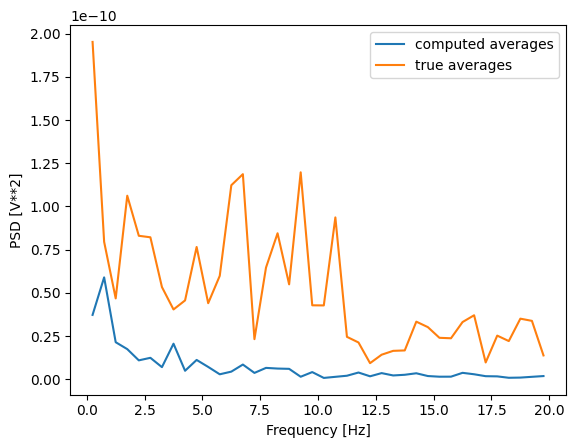

In [66]:
# Time Series
fs = 500 # Sampling frequency
T = 1/fs # Sampling period
def compare_true_versus_computed_psd(epoch_idx):
    true_averages = df.iloc[epoch_idx,2:-2].to_numpy()*1e-12
    start_seconds = epoch_idx*10
    end_seconds = start_seconds+10
    x = raw[start_seconds*fs:end_seconds*fs]
    f, Pxx = periodogram(x, fs,scaling='spectrum')
    bins = np.linspace(0,20,41)
    bin_midpoints = [lb+.25 for lb in bins[:-1]]
    bin_averages = []
    for i in range(len(bins)-1):
        hz_lims = (bins[i],bins[i+1])
        idx_lims = (np.where(f == hz_lims[0])[0][0],np.where(f == hz_lims[1])[0][0])
        bin_averages.append(Pxx[idx_lims[0]:idx_lims[1]].mean())
    # Plot the power spectral density
    plt.figure()
    plt.plot(bin_midpoints, bin_averages,label='computed averages')
    plt.plot(bin_midpoints, true_averages,label='true averages')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [V**2]')
    plt.legend()
compare_true_versus_computed_psd(506)

In [ ]:



def difference_signal(epoch_idx):
    true_averages = df.iloc[epoch_idx,2:-2].to_numpy()*1e-12
    start_seconds = epoch_idx*10
    end_seconds = start_seconds+10
    t = np.arange(start_seconds, end_seconds, T) # Time vector
    x = raw[start_seconds*fs:end_seconds*fs]
    # plt.plot(t,x)
    # Compute the power spectral density
    f, Pxx = periodogram(x, fs,scaling='spectrum')
    bins = np.linspace(0,20,41)
    bin_midpoints = [lb+.25 for lb in bins[:-1]]
    bin_averages = []
    for i in range(len(bins)-1):
        hz_lims = (bins[i],bins[i+1])
        idx_lims = (np.where(f == hz_lims[0])[0][0],np.where(f == hz_lims[1])[0][0])
        bin_averages.append(Pxx[idx_lims[0]:idx_lims[1]].mean())
    return bin_averages-true_averages

signals = []
for i in range(100):
    signals.append(difference_signal(i))
df = pd.DataFrame(signals)
import seaborn as sns

In [31]:
length_samples = len(raw)
length_seconds = length_samples / fs
length_epochs = length_seconds / 10

In [50]:

def random_difference_signal(epoch_idx):
    random_epoch = np.random.randint(0,length_epochs-1)
    true_averages = df.iloc[random_epoch,2:-2].to_numpy()*1e-12
    start_seconds = epoch_idx*10
    end_seconds = start_seconds+10
    t = np.arange(start_seconds, end_seconds, T) # Time vector
    x = raw[start_seconds*fs:end_seconds*fs]
    # plt.plot(t,x)
    # Compute the power spectral density
    f, Pxx = periodogram(x, fs,scaling='spectrum')
    bins = np.linspace(0,20,41)
    bin_midpoints = [lb+.25 for lb in bins[:-1]]
    bin_averages = []
    for i in range(len(bins)-1):
        hz_lims = (bins[i],bins[i+1])
        idx_lims = (np.where(f == hz_lims[0])[0][0],np.where(f == hz_lims[1])[0][0])
        bin_averages.append(Pxx[idx_lims[0]:idx_lims[1]].mean())
    return bin_averages-true_averages
random_signals = []
for i in range(4000):
    random_signals.append(random_difference_signal(i))
df_random_signals = pd.DataFrame(random_signals)
signals = []
for i in range(4000):
    signals.append(difference_signal(i))
df_signals = pd.DataFrame(signals)
import seaborn as sns

<AxesSubplot:xlabel='variable', ylabel='value'>

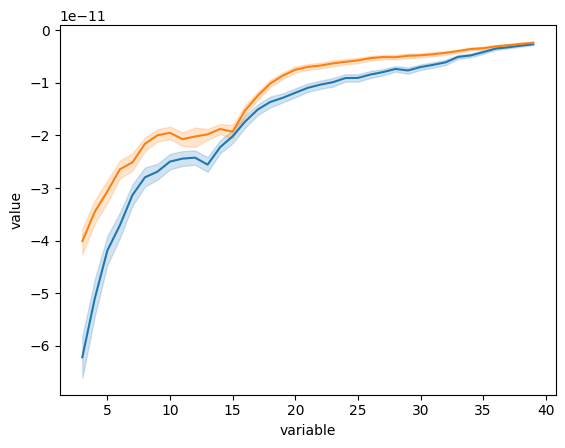

In [49]:
sns.lineplot(data=df_random_signals.iloc[:,3:].melt(),x='variable',y='value')
sns.lineplot(data=df_signals.iloc[:,3:].melt(),x='variable',y='value')
